In [6]:
import pandas as pd
import os

In [7]:
#지정된 경로에 있는 파일 리스트

files = os.listdir("../csv/2017")

In [8]:
#지정된 폴더에 있는 파일들을 하나의 데이터프레임으로 결합
#빈 데이터프레임 생성
#반복문을 이용하여 리스트에 있는 csv파일들을 하나씩 로드하여 
#빈 데이터 프레임에 concat() 결합


df_2017 = pd.DataFrame() #빈 데이터프레임 생성

#반복문을 사용하여 빈 데이터 프레임에 결합
for file in files: 
    path = "../csv/2017/"
    df = pd.read_csv(path+file) #경로랑 파일이랑 같이
    df_2017 = pd.concat([df_2017, df], ignore_index=True)
len(df_2017)

70132

In [9]:
files = os.listdir("../csv/2021")
files

['202110_expense_list.xlsx',
 '202110_expense_list.xml',
 '202105_expense_list.json',
 '202104_expense_list.xml',
 '202109_expense_list.xlsx',
 '202107_expense_list.csv',
 '202111_expense_list.xlsx',
 '202103_expense_list.csv',
 '202104_expense_list.json',
 '202108_expense_list.csv',
 '202108_expense_list.xlsx',
 '202101_expense_list.json',
 '202112_expense_list.xlsx',
 '202111_expense_list.xml',
 '202112_expense_list.csv',
 '202107_expense_list.json',
 '202106_expense_list.csv',
 '202105_expense_list.xml',
 '202102_expense_list.json',
 '202101_expense_list.xml',
 '202102_expense_list.csv',
 '202106_expense_list.json',
 '202103_expense_list.json',
 '202109_expense_list.csv',
 '202105_expense_list.csv',
 '202103_expense_list.xlsx',
 '202106_expense_list.xml',
 '202112_expense_list.xml',
 '202111_expense_list.csv',
 '202106_expense_list.xlsx',
 '202109_expense_list.xml',
 '202102_expense_list.xlsx',
 '202102_expense_list.xml',
 '202112_expense_list.json',
 '202101_expense_list.csv',
 '20

In [10]:
#폴더 안에 csv파일만 가지고 오기
files = [file for file in files if file.endswith(".csv")]
files

['202107_expense_list.csv',
 '202103_expense_list.csv',
 '202108_expense_list.csv',
 '202112_expense_list.csv',
 '202106_expense_list.csv',
 '202102_expense_list.csv',
 '202109_expense_list.csv',
 '202105_expense_list.csv',
 '202111_expense_list.csv',
 '202101_expense_list.csv',
 '202104_expense_list.csv',
 '202110_expense_list.csv']

1. 컬럼명 변경 - ['nid', '제목', 'url', '부서레벨1','부서레벨2','부서레벨3','부서레벨4','부서레벨5','집행연도','집행','구분','부서명','집행일시','집행장소','집행목적','대상인원','결제방법','집행금액']
2. 컬럼 삭제 - ['부서레벨3','부서레벨4','부서레벨5','예산','집행','구분']
3. 월별 집행금액의 합 시각화 (바 그래프)
4. pivot_table을 사용하여 그룹화(연도, 월) 집행금액의 합계를 그래프 출력 (바 그래프)

In [11]:
df_2017.head(2)

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
0,11527154,2017년 2월 시의회사무처 보건복지전문위원실 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11527154,의회사무처,보건복지전문위원실,NaN,NaN,NaN,2017,2,NaN,NaN,NaN,시의회사무처 보건복지전문위원실,2017-02-23 12:54,（주）스타벅스커피코 (중구 소공로),제272회 임시회 현장방문 논의 간담회,수석전문위원 외 5명,카드,30000
1,11527154,2017년 2월 시의회사무처 보건복지전문위원실 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11527154,의회사무처,보건복지전문위원실,NaN,NaN,NaN,2017,2,NaN,NaN,NaN,시의회사무처 보건복지전문위원실,2017-02-22 13:03,코바코보라매점 (동작구 보라매로5가),보라매병원 자료수집 관련 간담회,수석전문위원 외 1명,카드,7500


In [12]:
df_2017.columns = ['nid', '제목', 'url', '부서레벨1','부서레벨2','부서레벨3','부서레벨4','부서레벨5','집행연도','집행월','예산','집행','구분','부서명','집행일시','집행장소','집행목적','대상인원','결제방법','집행금액']

In [13]:
df_2017.drop(['부서레벨3','부서레벨4','부서레벨5','예산','집행','구분'], axis = 1, inplace = True) # axis 드랍할 축 지정

In [14]:
df_2017.head(1)

,nid,제목,url,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,11527154,2017년 2월 시의회사무처 보건복지전문위원실 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11527154,의회사무처,보건복지전문위원실,2017,2,시의회사무처 보건복지전문위원실,2017-02-23 12:54,（주）스타벅스커피코 (중구 소공로),제272회 임시회 현장방문 논의 간담회,수석전문위원 외 5명,카드,30000


In [15]:
month_df = df_2017.groupby("집행월").sum()["집행금액"]
month_df

집행월
1      710368860
2      712679864
3      737250454
4      635265805
5      647582378
6      758257342
7      701604626
8      661174850
9      806170700
10     637219943
11     843619171
12    1225747394
Name: 집행금액, dtype: int64

In [16]:
pivot_month = pd.pivot_table(df_2017, index = ["집행월"], columns = ["집행연도"], values = ["집행금액"], aggfunc = "sum")
pivot_month

,집행금액
집행연도,2017
집행월,
1,710368860
2,712679864
3,737250454
4,635265805
5,647582378
6,758257342
7,701604626
8,661174850


<AxesSubplot:xlabel='집행월'>

/Users/chulwonchae/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  func(*args, **kwargs)
/Users/chulwonchae/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  func(*args, **kwargs)
/Users/chulwonchae/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/Users/chulwonchae/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chulwonchae/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes

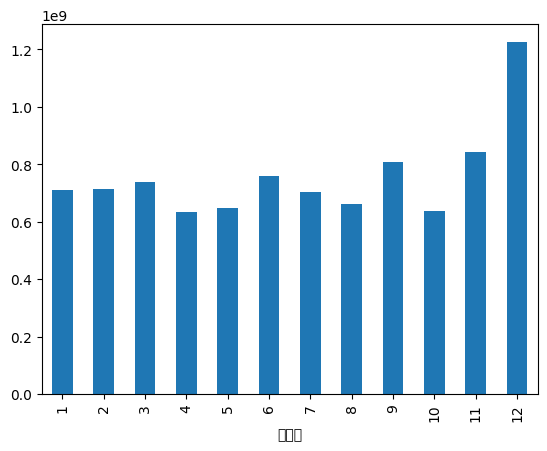

In [17]:
month_df.plot.bar()

In [18]:
import matplotlib.pyplot as plt

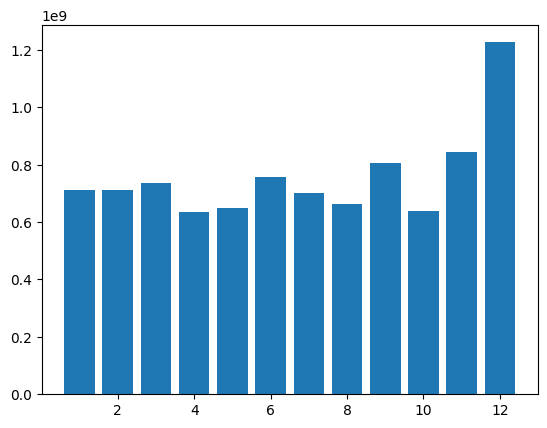

In [22]:
# 바그래프 matplot 이용하여 출력
# x값 y값
# x-> 집행월 y ->집행금액의 합계


x = month_df.index
plt.bar(x,month_df)
plt.show()

<AxesSubplot:ylabel='집행월'>

/Users/chulwonchae/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  func(*args, **kwargs)
/Users/chulwonchae/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  func(*args, **kwargs)
/Users/chulwonchae/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/Users/chulwonchae/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/Users/chulwonchae/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/Users/chulwonchae/Library/Python/3.8

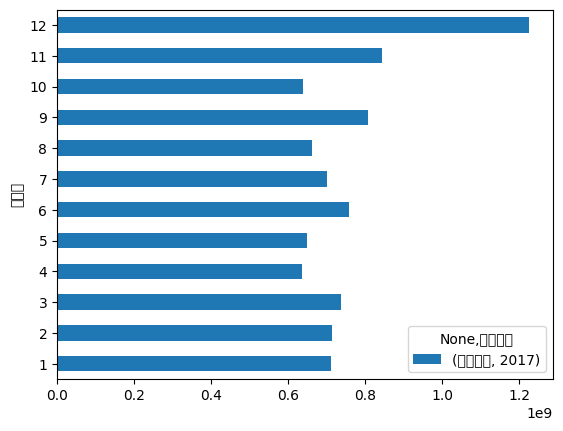

In [20]:
pivot_month.plot.barh()